<a href="https://colab.research.google.com/github/sak1sham/Prediction-of-Arctic-Sea-Ice-using-Deep-Learning/blob/main/Entire%20year%20models_All_Final%20code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D, TimeDistributed, LSTM, MaxPooling2D, Input, MaxPooling3D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Ftrl, Nadam

In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
     / 149.1MB 1.0MB/s
     |████████████████████████████████| 6.5MB 5.7MB/s 
     |████████████████████████████████| 225kB 39.2MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759562 sha256=43952153ba5645400ddc163f1cdc8872405a269392ccff4f7b8a0e5e4d9eeebc
  Stored in directory: /tmp/pip-ephem-wheel-cache-chqv29rc/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl 

In [ ]:
!pip install netCDF4 
!pip install PyDrive

     |████████████████████████████████| 4.7MB 5.2MB/s 
     |████████████████████████████████| 317kB 42.8MB/s 


In [ ]:
import gzip
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap

# Import data to this colab environment
*Two cells in this part need authentication to your GDrive -- to check if you have access to the data-file*

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
## Need to authenticate to get the Datafile in this environment.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1wDkyZRZUWSeMbfz5_XxeHXUD1HWgvHet"})
downloaded.GetContentFile('HadISST_Data_file')

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exceptio

In [ ]:
## Need to authenticate to save the Datafile to Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Data visualization


In [ ]:
f = gzip.open("/content/HadISST_Data_file")
f_nc = nc.Dataset('dummy', mode='r', memory=f.read())

In [ ]:
All_variables = f_nc.variables
print(All_variables)

{'time': <class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    units: days since 1870-1-1 0:0:0
    calendar: gregorian
    long_name: Time
    standard_name: time
unlimited dimensions: time
current shape = (1808,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'time_bnds': <class 'netCDF4._netCDF4.Variable'>
float32 time_bnds(time, nv)
unlimited dimensions: time
current shape = (1808, 2)
filling on, default _FillValue of 9.969209968386869e+36 used, 'latitude': <class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    units: degrees_north
    long_name: Latitude
    standard_name: latitude
unlimited dimensions: 
current shape = (180,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'longitude': <class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    long_name: Longitude
    standard_name: longitude
unlimited dimensions: 
current shape = (360,)
filling on, default _FillValue of 9.969209968386869e+36 used, 's

In [ ]:
time = f_nc['time'][:]
lati = f_nc['latitude'][0:30]
longi = f_nc['longitude'][:]
tb = f_nc['time_bnds'][:]
sic = f_nc['sic'][:,0:30,:]

In [ ]:
print(lati)

[89.5 88.5 87.5 86.5 85.5 84.5 83.5 82.5 81.5 80.5 79.5 78.5 77.5 76.5
 75.5 74.5 73.5 72.5 71.5 70.5 69.5 68.5 67.5 66.5 65.5 64.5 63.5 62.5
 61.5 60.5]


In [ ]:
print(sic[1,:,:])

[[1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [0.8799999952316284 0.8799999952316284 0.8500000238418579 ...
  0.4399999976158142 0.41999998688697815 0.8799999952316284]
 [0.4000000059604645 0.550000011920929 0.5899999737739563 ...
  0.28999999165534973 0.33000001311302185 0.3499999940395355]
 [0.0 0.17000000178813934 0.25 ... 0.0 0.0 0.0]]


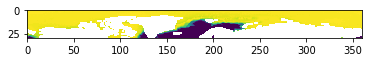

In [ ]:
plt.imshow(sic[0])

In [ ]:
sic = np.where(sic > 1, -0.5 , (np.where(sic < 0, -0.5 , sic)))

<function matplotlib.pyplot.show>

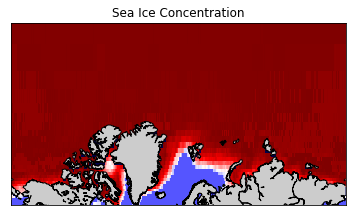

In [ ]:
mp = Basemap(projection='merc',llcrnrlon=-180.,llcrnrlat=60.,urcrnrlon=180.,urcrnrlat=89.,resolution='l')
longs , lats = np.meshgrid(longi,lati)
x ,y = mp(longs, lats)
c_scheme = mp.pcolor(x,y,np.squeeze(sic[18,:,:]), cmap = 'seismic')
mp.drawcoastlines()
mp.fillcontinents()
plt.title('Sea Ice Concentration')
plt.show

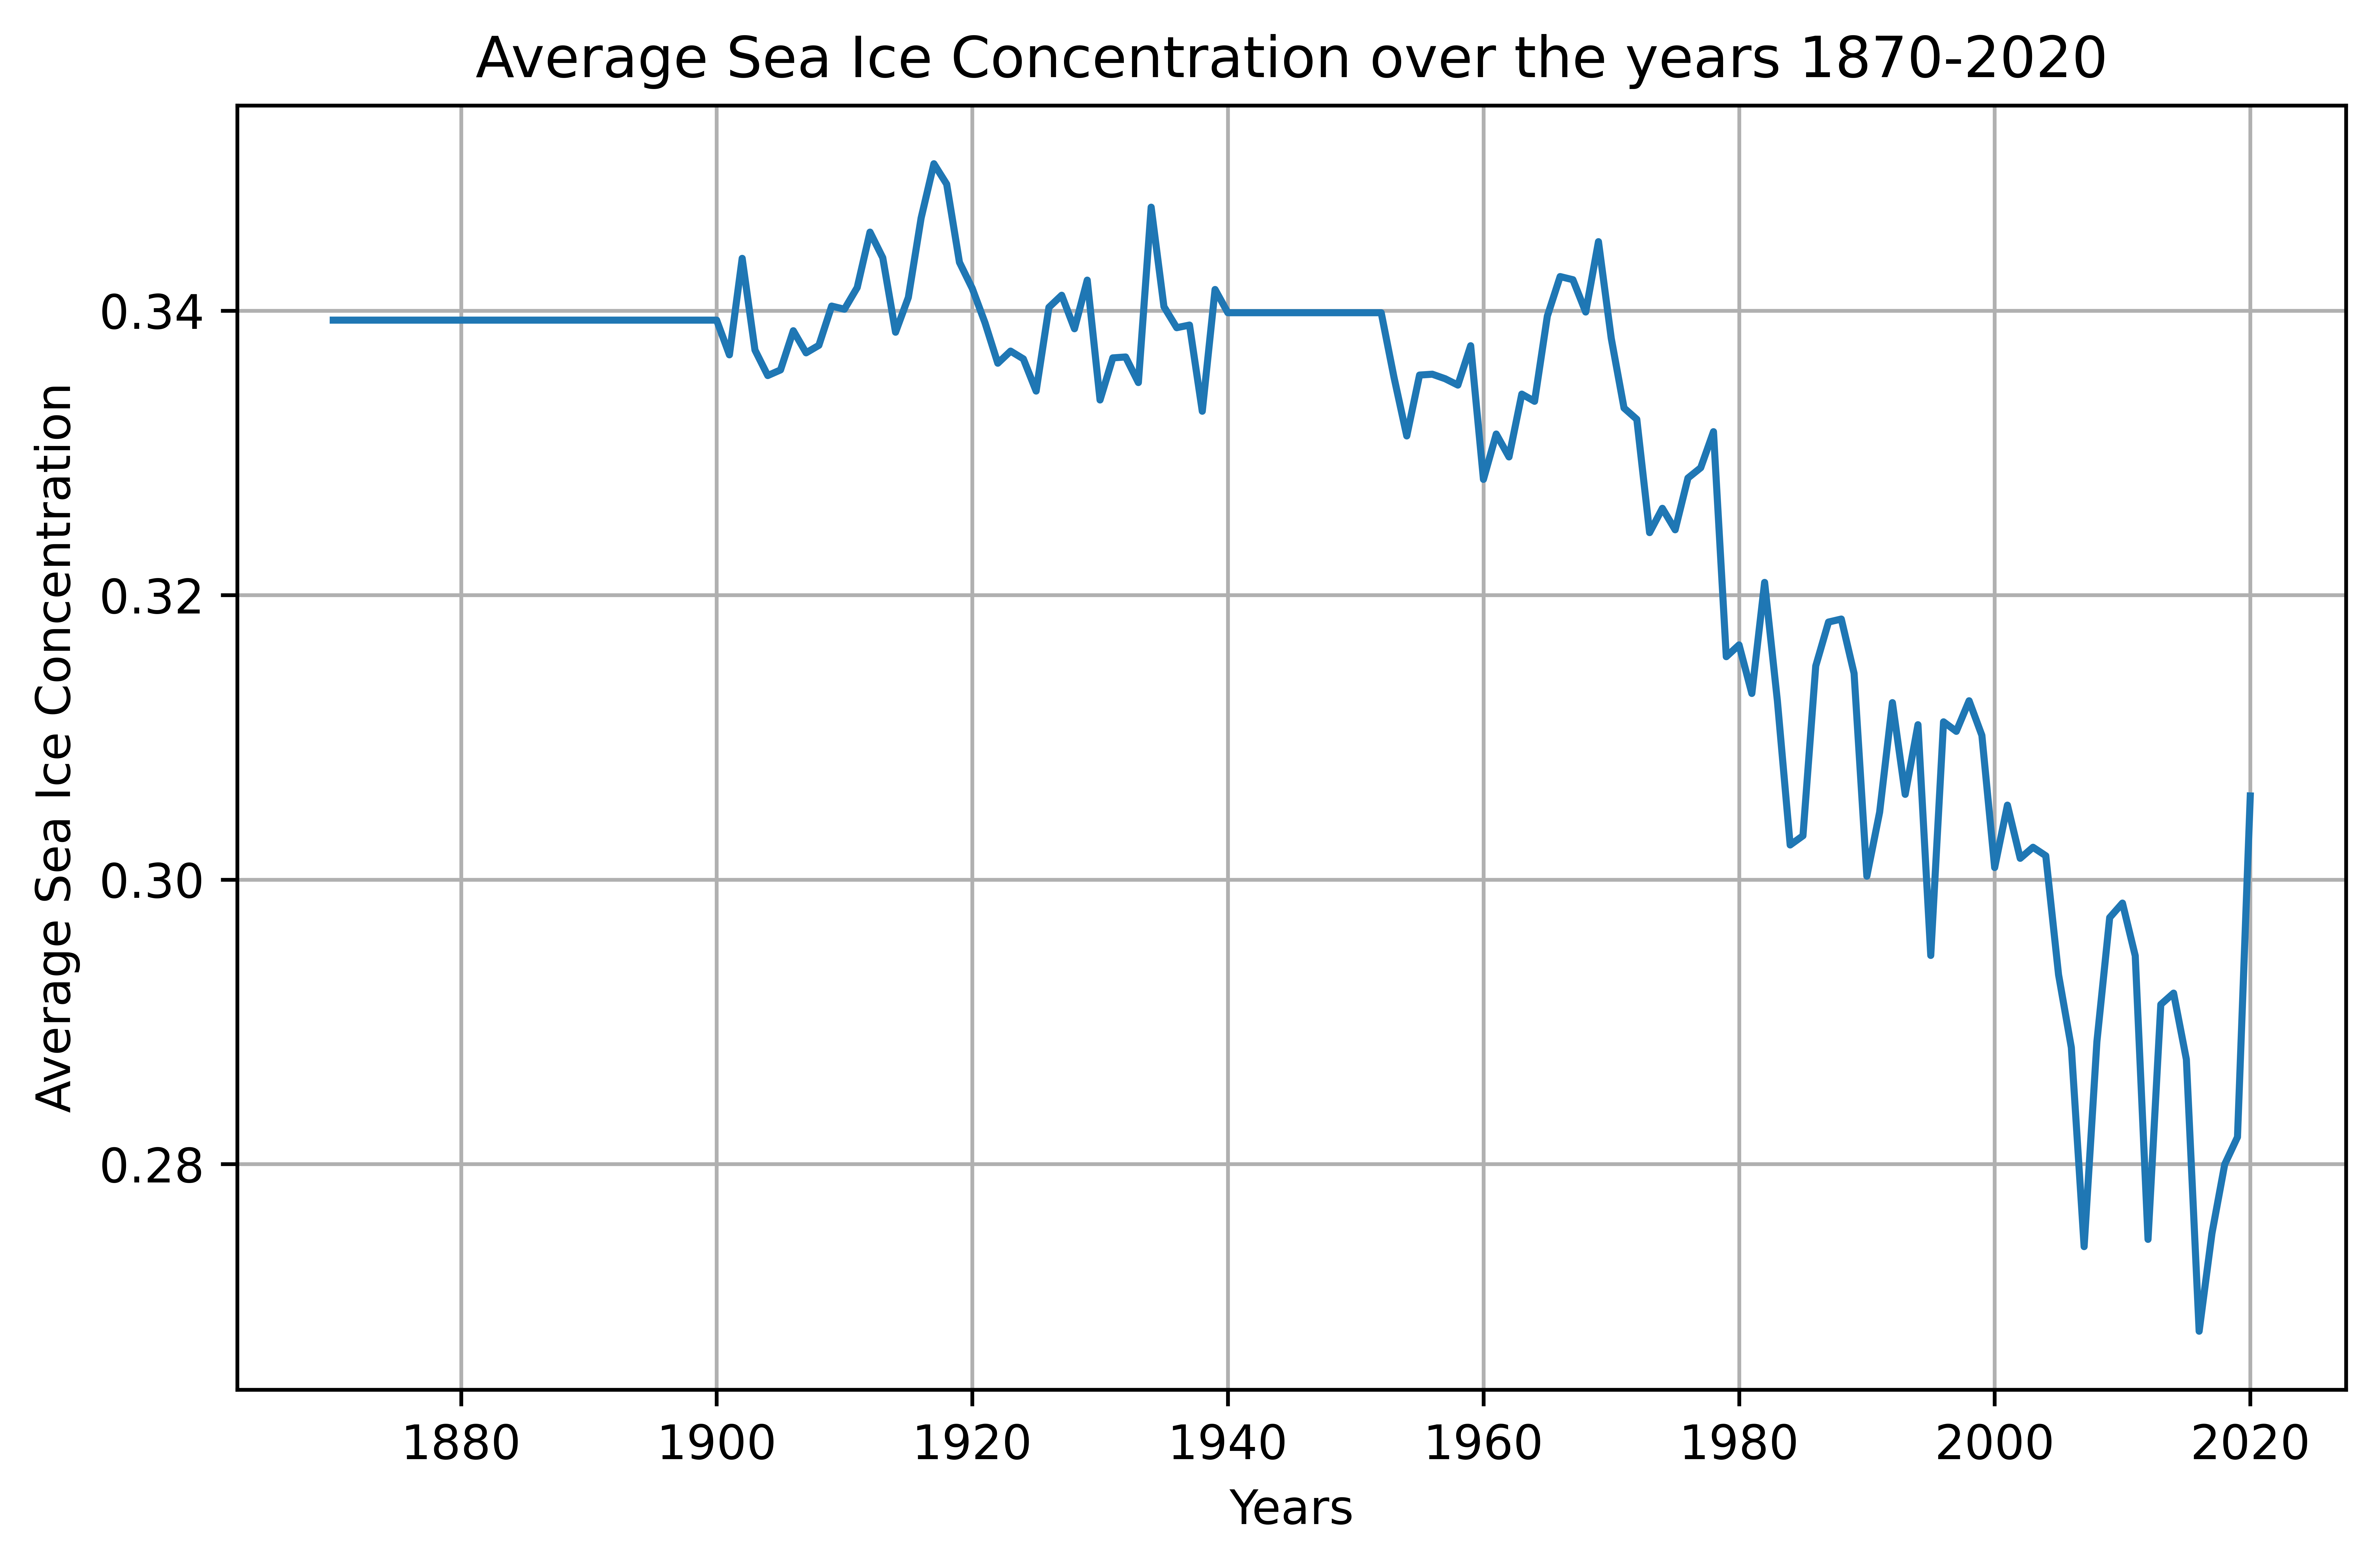

In [ ]:
sic_avg = []
x_ = [i for i in range(1870, 2021)]
for i in range(0, len(sic), 12):
  sic_avg.append(np.average(sic[i:i+12]))

plt.figure(figsize=(8, 5), dpi=1200)
plt.plot(x_, sic_avg)
plt.grid()
plt.xlabel('Years')
plt.ylabel('Average Sea Ice Concentration')
plt.title('Average Sea Ice Concentration over the years 1870-2020')
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/Results/Final Results + Plots/YearlyAvg.pdf', format='pdf')
plt.show()

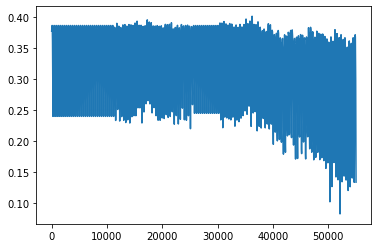

In [ ]:
x = sic.reshape(1808, 10800).mean(axis=1)
plt.plot(time,x)
plt.show()

# Defining Coefficients


## Anomaly Correlation Cdefficient

In [ ]:
import math
def acc(actual, predicted):
  pred_avg = np.average(predicted)
  act_avg = np.average(actual)
  diff_pred = predicted - pred_avg
  diff_act = actual - act_avg
  numerator = np.mean(np.sum(diff_pred*diff_act, axis=0))
  denominator = math.sqrt(np.mean(np.sum(diff_pred**2, axis=0)) * np.mean(np.sum(diff_act**2, axis=0)))
  ret_val = numerator/denominator
  return (100 * ret_val)

## Mean Absolute Error

In [ ]:
def mae(actual, predicted):
  ret_val = np.mean(abs(predicted.reshape(-1, 10800) - actual.reshape(-1, 10800)))
  return (ret_val)

## Root Mean Squared Error

In [ ]:
def rmse(actual, predicted):
  ret_val = math.sqrt(np.mean(np.square(predicted.reshape(-1, 10800) - actual.reshape(-1, 10800))))
  return (ret_val)

## Nash–Sutcliffe efficiency (NSE)

In [ ]:
def nse(actual, predicted):
  diff_num = actual.reshape(-1, 10800) - predicted.reshape(-1, 10800)
  act_avg = np.average(actual)
  diff_den = actual.reshape(-1, 10800) - act_avg
  numerator = np.sum(diff_num**2)
  denominator = np.sum(diff_den**2)
  ret_val = 1-(numerator/denominator)
  return (ret_val)

# NN

## Prepare the train-test Data



In [ ]:
N_months_available = len(sic)
N_months_predict = 1
N_stack = 3
X_len = N_months_available - (N_stack-1) - N_months_predict
Y_len = X_len

X = np.zeros(shape = (X_len, 30*360*N_stack))
for i in range(X_len):
  X[i] = np.stack(sic[i:i+N_stack], axis=-1).flatten()

#Y = np.zeros(shape = (Y_len, 30, 360, N_months_predict))
Y = np.zeros(shape = (Y_len, 10800))
for i in range(Y_len):
  Y[i] = np.stack(sic[i+N_stack : i+N_stack+N_months_predict], axis = -1).flatten()

print(X.shape)
print(Y.shape)

(1805, 32400)
(1805, 10800)


In [ ]:
N_train_test_split = 1600
X_train = X[800:N_train_test_split]
Y_train = Y[800:N_train_test_split]
X_test = X[N_train_test_split:]
Y_test = Y[N_train_test_split:]
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 800
number of test examples = 205
X_train shape: (800, 32400)
Y_train shape: (800, 10800)
X_test shape: (205, 32400)
Y_test shape: (205, 10800)


## Implement NN  model

In [ ]:
model = Sequential()

model.add(Dense(50000, activation='tanh', input_dim=32400))
model.add(Dense(35000, activation='tanh'))
model.add(Dense(25000, activation='sigmoid'))
model.add(Dense(12500, activation='tanh'))
model.add(Dense(10800, activation='tanh'))

opt = Adagrad(lr=0.2)
model.compile(loss='mean_squared_error',
              optimizer = opt)

print(model.summary())

plot_model(model, show_shapes=True, show_layer_names=True)
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), batch_size=N_train_test_split, epochs=75, shuffle=False)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 50000)             1620050000
_________________________________________________________________
dense_11 (Dense)             (None, 35000)             1750035000
_________________________________________________________________
dense_12 (Dense)             (None, 25000)             875025000 
_________________________________________________________________
dense_13 (Dense)             (None, 12500)             312512500 
_________________________________________________________________
dense_14 (Dense)             (None, 10800)             135010800 
Total params: 4,692,633,300
Trainable params: 4,692,633,300
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/75
1/1 [==============================] - 12s 12s/step - loss: 0.7315 - val_loss: 0.2518


In [ ]:
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), batch_size=N_train_test_split, epochs=130, shuffle=False)

Epoch 1/130
1/1 [==============================] - 12s 12s/step - loss: 0.0211 - val_loss: 0.0393
Epoch 2/130
1/1 [==============================] - 10s 10s/step - loss: 0.0211 - val_loss: 0.0393
Epoch 3/130
1/1 [==============================] - 10s 10s/step - loss: 0.0211 - val_loss: 0.0393
Epoch 4/130
1/1 [==============================] - 10s 10s/step - loss: 0.0211 - val_loss: 0.0393
Epoch 5/130
1/1 [==============================] - 10s 10s/step - loss: 0.0211 - val_loss: 0.0392
Epoch 6/130
1/1 [==============================] - 10s 10s/step - loss: 0.0210 - val_loss: 0.0392
Epoch 7/130
1/1 [==============================] - 11s 11s/step - loss: 0.0210 - val_loss: 0.0392
Epoch 8/130
1/1 [==============================] - 11s 11s/step - loss: 0.0210 - val_loss: 0.0392
Epoch 9/130
1/1 [==============================] - 11s 11s/step - loss: 0.0210 - val_loss: 0.0392
Epoch 10/130
1/1 [==============================] - 10s 10s/step - loss: 0.0210 - val_loss: 0.0391
Epoch 11/130
1/1 [=

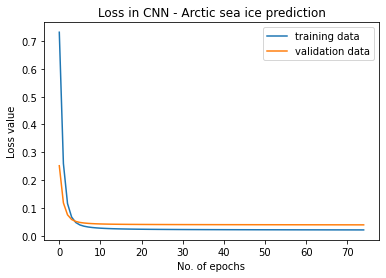

In [ ]:
plt.plot(history.history['loss'], label='training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss in CNN - Arctic sea ice prediction')
plt.ylabel('Loss value')
plt.xlabel('No. of epochs')
plt.legend(loc="upper right")
plt.show()

In [ ]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]

# Years 2012-2019. 8 years, 96 months. 101-196
currYear = 2012
X_check = X_test[101:197]
Y_check = Y_test[101:197]
Y_pred = model.predict(X_check)
Y_pred = Y_pred.reshape(12*8, 30, 360)
Y_check = Y_check.reshape(12*8, 30, 360)
diff_Y = Y_pred-Y_check
for i in range(len(diff_Y)):
  if(i%12 == 0 and i>0):
    currYear += 1
  mp = Basemap(projection='merc',llcrnrlon=-180.,llcrnrlat=60.,urcrnrlon=180.,urcrnrlat=89.,resolution='l')
  longs , latis = np.meshgrid(longi,lati)
  x ,y = mp(longs, latis)
  c_scheme = mp.pcolor(x,y,np.squeeze(diff_Y[i]), cmap = 'seismic')
  mp.drawcoastlines()
  mp.fillcontinents()
  plt.title('(Y_pred-Y_actual) for ' + months[i%12]  + ' ' + str(currYear))
  plt.show()

## Saving NN output

In [ ]:
fn = '/content/NN_output_rem_first800.nc'
ds = nc.Dataset(fn, 'w', format='NETCDF4')
time = ds.createDimension('time', None)
lat = ds.createDimension('lat', 30)
lon = ds.createDimension('lon', 360)
times = ds.createVariable('time', 'f4', ('time',))
lats = ds.createVariable('lat', 'f4', ('lat',))
lons = ds.createVariable('lon', 'f4', ('lon',))
sics = ds.createVariable('sics', 'f4', ('time', 'lat', 'lon',))
sics.units = 'Unknown'
lats[:] = np.arange(60.5, 90.5, 1.0)
lons[:] = np.arange(-179.5, 180.5, 1.0)

In [ ]:
Y1 = model.predict(X_test)
Y1 = Y1.reshape(205,30,360)
ds.variables['sics'][:] = Y1
Y_test = Y_test.reshape(205,30,360)
print(sics.shape)
print(Y_test.shape)

(205, 30, 360)
(205, 30, 360)


In [ ]:
ds.close()

In [ ]:
f = '/content/NN_output_rem_first800.nc'
d = nc.Dataset(f, 'r')
d.variables

OrderedDict([('time', <class 'netCDF4._netCDF4.Variable'>
              float32 time(time)
              unlimited dimensions: time
              current shape = (205,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('lat', <class 'netCDF4._netCDF4.Variable'>
              float32 lat(lat)
              unlimited dimensions: 
              current shape = (30,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('lon', <class 'netCDF4._netCDF4.Variable'>
              float32 lon(lon)
              unlimited dimensions: 
              current shape = (360,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('sics', <class 'netCDF4._netCDF4.Variable'>
              float32 sics(time, lat, lon)
                  units: Unknown
              unlimited dimensions: time
              current shape = (205, 30, 360)
              filling on, default _FillValue of 9.9692099

In [ ]:
sic_out = d.variables['sics'][:]
long_out = d.variables['lon'][:]
lat_out = d.variables['lat'][:]

In [ ]:
print(lat)

<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 30


In [ ]:
X_check = X_test
Y_check = Y_test
Y_pred = model.predict(X_check)
Y_pred = Y_pred.reshape(len(X_check), 30, 360)
Y_check = Y_check.reshape(len(X_check), 30, 360)

print("ACC value in (%): ", acc(Y_check, Y_pred))
print("MAE value: ", mae(Y_test, Y_pred))
print("RMSE value: ", rmse(Y_test, Y_pred))
print("NSE value: ", nse(Y_test, Y_pred))

ACC value in (%):  96.07168853159384
MAE value:  0.08848180707327594
RMSE value:  0.1870761702116612
NSE value:  0.9210365759319761


# CNN (with Dense layer)

## Prepare the train-test Data



In [ ]:
N_months_available = len(sic)
N_months_predict = 1
N_stack = 3
X_len = N_months_available - (N_stack-1) - N_months_predict
Y_len = X_len

X = np.zeros(shape = (X_len, 30, 360, N_stack))
for i in range(X_len):
  X[i] = np.stack(sic[i:i+N_stack], axis=-1)

#Y = np.zeros(shape = (Y_len, 30, 360, N_months_predict))
Y = np.zeros(shape = (Y_len, 10800))
for i in range(Y_len):
  Y[i] = np.stack(sic[i+N_stack : i+N_stack+N_months_predict], axis = -1).flatten()

print(X.shape)
print(Y.shape)

(1805, 30, 360, 3)
(1805, 10800)


In [ ]:
N_train_test_split = 1600
X_train = X[800:N_train_test_split]
Y_train = Y[800:N_train_test_split]
X_test = X[N_train_test_split:]
Y_test = Y[N_train_test_split:]
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 800
number of test examples = 205
X_train shape: (800, 30, 360, 3)
Y_train shape: (800, 10800)
X_test shape: (205, 30, 360, 3)
Y_test shape: (205, 10800)


## Implement CNN  model

In [ ]:
model = Sequential()

model.add(Conv2D(24, (3, 3),activation = 'tanh', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation = 'tanh'))
model.add(Conv2D(48, (3, 3), activation = 'tanh'))
model.add(Conv2D(72, (3, 3), activation = 'tanh'))
model.add(Conv2D(16, (3, 3), activation = 'tanh'))
model.add(Conv2D(1, (3, 3), activation = 'tanh'))

model.add(Flatten())

model.add(Dense(12000, activation='tanh'))
model.add(Dense(10800, activation='tanh'))

opt = Adagrad(lr=0.2)
model.compile(loss='mean_squared_error',
              optimizer = opt)

print(model.summary())

#plot_model(model, show_shapes=True)
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), batch_size=N_train_test_split, epochs=100, shuffle=False)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 358, 24)       672       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 356, 32)       6944      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 354, 48)       13872     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 352, 72)       31176     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 350, 16)       10384     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 348, 1)        145       
_________________________________________________________________
flatten (Flatten)            (None, 6264)              0

In [ ]:
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), batch_size=N_train_test_split, epochs=105, shuffle=False)

Epoch 1/105
1/1 [==============================] - 12s 12s/step - loss: 0.0197 - val_loss: 0.0375
Epoch 2/105
1/1 [==============================] - 10s 10s/step - loss: 0.0197 - val_loss: 0.0375
Epoch 3/105
1/1 [==============================] - 10s 10s/step - loss: 0.0196 - val_loss: 0.0374
Epoch 4/105
1/1 [==============================] - 10s 10s/step - loss: 0.0196 - val_loss: 0.0374
Epoch 5/105
1/1 [==============================] - 10s 10s/step - loss: 0.0195 - val_loss: 0.0373
Epoch 6/105
1/1 [==============================] - 10s 10s/step - loss: 0.0195 - val_loss: 0.0372
Epoch 7/105
1/1 [==============================] - 10s 10s/step - loss: 0.0194 - val_loss: 0.0372
Epoch 8/105
1/1 [==============================] - 10s 10s/step - loss: 0.0194 - val_loss: 0.0371
Epoch 9/105
1/1 [==============================] - 10s 10s/step - loss: 0.0194 - val_loss: 0.0370
Epoch 10/105
1/1 [==============================] - 10s 10s/step - loss: 0.0193 - val_loss: 0.0370
Epoch 11/105
1/1 [=

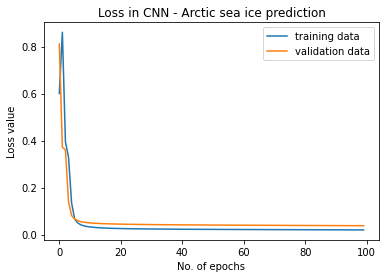

In [ ]:
plt.plot(history.history['loss'], label='training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss in CNN - Arctic sea ice prediction')
plt.ylabel('Loss value')
plt.xlabel('No. of epochs')
plt.legend(loc="upper right")
plt.show()

In [ ]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]

# Years 2012-2019. 8 years, 96 months. 101-196
currYear = 2012
X_check = X_test[101:197]
Y_check = Y_test[101:197]
Y_pred = model.predict(X_check)
Y_pred = Y_pred.reshape(12*8, 30, 360)
Y_check = Y_check.reshape(12*8, 30, 360)
diff_Y = Y_pred-Y_check
for i in range(len(diff_Y)):
  if(i%12 == 0 and i>0):
    currYear += 1
  mp = Basemap(projection='merc',llcrnrlon=-180.,llcrnrlat=60.,urcrnrlon=180.,urcrnrlat=89.,resolution='l')
  longs , latis = np.meshgrid(longi,lati)
  x ,y = mp(longs, latis)
  c_scheme = mp.pcolor(x,y,np.squeeze(diff_Y[i]), cmap = 'seismic')
  mp.drawcoastlines()
  mp.fillcontinents()
  plt.title('(Y_pred-Y_actual) for ' + months[i%12]  + ' ' + str(currYear))
  plt.show()

## Saving Data

In [ ]:
fn = '/content/CNN_output_rem_first800.nc'
ds = nc.Dataset(fn, 'w', format='NETCDF4')
time = ds.createDimension('time', None)
lat = ds.createDimension('lat', 30)
lon = ds.createDimension('lon', 360)
times = ds.createVariable('time', 'f4', ('time',))
lats = ds.createVariable('lat', 'f4', ('lat',))
lons = ds.createVariable('lon', 'f4', ('lon',))
sics = ds.createVariable('sics', 'f4', ('time', 'lat', 'lon',))
sics.units = 'Unknown'
lats[:] = np.arange(60.5, 90.5, 1.0)
lons[:] = np.arange(-179.5, 180.5, 1.0)

In [ ]:
Y1 = model.predict(X_test)
Y1 = Y1.reshape(205,30,360)
ds.variables['sics'][:] = Y1
Y_test = Y_test.reshape(205,30,360)
print(sics.shape)
print(Y_test.shape)

(205, 30, 360)
(205, 30, 360)


In [ ]:
ds.close()

In [ ]:
f = '/content/CNN_output_rem_first800.nc'
d = nc.Dataset(f, 'r')
d.variables

OrderedDict([('time', <class 'netCDF4._netCDF4.Variable'>
              float32 time(time)
              unlimited dimensions: time
              current shape = (205,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('lat', <class 'netCDF4._netCDF4.Variable'>
              float32 lat(lat)
              unlimited dimensions: 
              current shape = (30,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('lon', <class 'netCDF4._netCDF4.Variable'>
              float32 lon(lon)
              unlimited dimensions: 
              current shape = (360,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('sics', <class 'netCDF4._netCDF4.Variable'>
              float32 sics(time, lat, lon)
                  units: Unknown
              unlimited dimensions: time
              current shape = (205, 30, 360)
              filling on, default _FillValue of 9.9692099

In [ ]:
sic_out = d.variables['sics'][:]
long_out = d.variables['lon'][:]
lat_out = d.variables['lat'][:]

In [ ]:
X_check = X_test
Y_check = Y_test
Y_pred = model.predict(X_check)
Y_pred = Y_pred.reshape(len(X_check), 30, 360)
Y_check = Y_check.reshape(len(X_check), 30, 360)

print("ACC value in (%): ", acc(Y_check, Y_pred))
print("MAE value: ", mae(Y_test, Y_pred))
print("RMSE value: ", rmse(Y_test, Y_pred))
print("NSE value: ", nse(Y_test, Y_pred))

ACC value in (%):  96.52357945835776
MAE value:  0.09283221522397675
RMSE value:  0.17522043579861202
NSE value:  0.9307278697066537


# ConvLSTM

## Prepare the train-test Data



In [ ]:
N_months_available = len(sic)
N_months_predict = 1
N_stack = 3
X_len = N_months_available - (N_stack-1) - N_months_predict
Y_len = X_len

X = np.zeros(shape = (X_len, N_stack, 30, 360))
for i in range(X_len):
  X[i] = np.stack(sic[i:i+N_stack])

Y = np.zeros(shape = (Y_len, 10800))
#Y = np.zeros(shape = (Y_len,1,30,360))
for i in range(Y_len):
  Y[i] = np.stack(sic[i+N_stack : i+N_stack+N_months_predict],axis = -1).flatten()

print(X.shape)
print(Y.shape)

(1805, 3, 30, 360)
(1805, 10800)


In [ ]:
N_train_test_split = 1600
X_train = X[800:N_train_test_split]
Y_train = Y[800:N_train_test_split]
X_test = X[N_train_test_split:]
Y_test = Y[N_train_test_split:]
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 800
number of test examples = 205
X_train shape: (800, 3, 30, 360)
Y_train shape: (800, 10800)
X_test shape: (205, 3, 30, 360)
Y_test shape: (205, 10800)


## Conv-LSTM

In [ ]:
from tensorflow.keras.layers import ConvLSTM2D, BatchNormalization, Input, Conv3D, TimeDistributed, Flatten
import numpy as np
import pylab as plt

#Reshape x data for use with keras, adding extra dimension at the end
numlat = X_train.shape[2]
numlong = X_train.shape[3]
stacklen = X_train.shape[1]
X_train = X_train.reshape(X_train.shape[0], stacklen, numlat, numlong,1)
X_test = X_test.reshape(X_test.shape[0], stacklen, numlat, numlong,1)

model3 = Sequential()
model3.add(Input(shape = X_train.shape[1:]))
model3.add(ConvLSTM2D(filters=16, kernel_size=(5,5), return_sequences=True, padding="same"))
model3.add(ConvLSTM2D(filters=24, kernel_size=(3,3), return_sequences=True, padding="same"))
model3.add(Conv3D(filters=16, kernel_size=(3,1,1), activation="tanh"))
model3.add(Conv3D(filters=1, kernel_size=(1,1,1), activation="tanh"))
model3.add(Flatten())
model3.add(Dense(10800, activation='tanh'))
model3.compile(loss="mean_squared_error", optimizer="adamax")
print(model3.summary())
plot_model(model3, show_shapes=True, show_layer_names=True)
history3 = model3.fit(X_train, Y_train, validation_data = (X_test, Y_test), batch_size= N_train_test_split, epochs=360, shuffle=False)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 3, 30, 360, 16)    27264     
_________________________________________________________________
conv_lst_m2d_1 (ConvLSTM2D)  (None, 3, 30, 360, 24)    34656     
_________________________________________________________________
conv3d (Conv3D)              (None, 1, 30, 360, 16)    1168      
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 1, 30, 360, 1)     17        
_________________________________________________________________
flatten (Flatten)            (None, 10800)             0         
_________________________________________________________________
dense (Dense)                (None, 10800)             116650800 
Total params: 116,713,905
Trainable params: 116,713,905
Non-trainable params: 0
__________________________________________

In [ ]:
model3.fit(X_train, Y_train, validation_data = (X_test, Y_test), batch_size= N_train_test_split, epochs=30, shuffle=False)

Epoch 1/30
1/1 [==============================] - 44s 44s/step - loss: 0.0058 - val_loss: 0.0158
Epoch 2/30
1/1 [==============================] - 42s 42s/step - loss: 0.0058 - val_loss: 0.0162
Epoch 3/30
1/1 [==============================] - 42s 42s/step - loss: 0.0057 - val_loss: 0.0158
Epoch 4/30
1/1 [==============================] - 42s 42s/step - loss: 0.0057 - val_loss: 0.0161
Epoch 5/30
1/1 [==============================] - 42s 42s/step - loss: 0.0057 - val_loss: 0.0157
Epoch 6/30
1/1 [==============================] - 42s 42s/step - loss: 0.0057 - val_loss: 0.0160
Epoch 7/30
1/1 [==============================] - 42s 42s/step - loss: 0.0057 - val_loss: 0.0157
Epoch 8/30
1/1 [==============================] - 42s 42s/step - loss: 0.0057 - val_loss: 0.0160
Epoch 9/30
1/1 [==============================] - 42s 42s/step - loss: 0.0057 - val_loss: 0.0156
Epoch 10/30
1/1 [==============================] - 42s 42s/step - loss: 0.0057 - val_loss: 0.0161
Epoch 11/30
1/1 [============

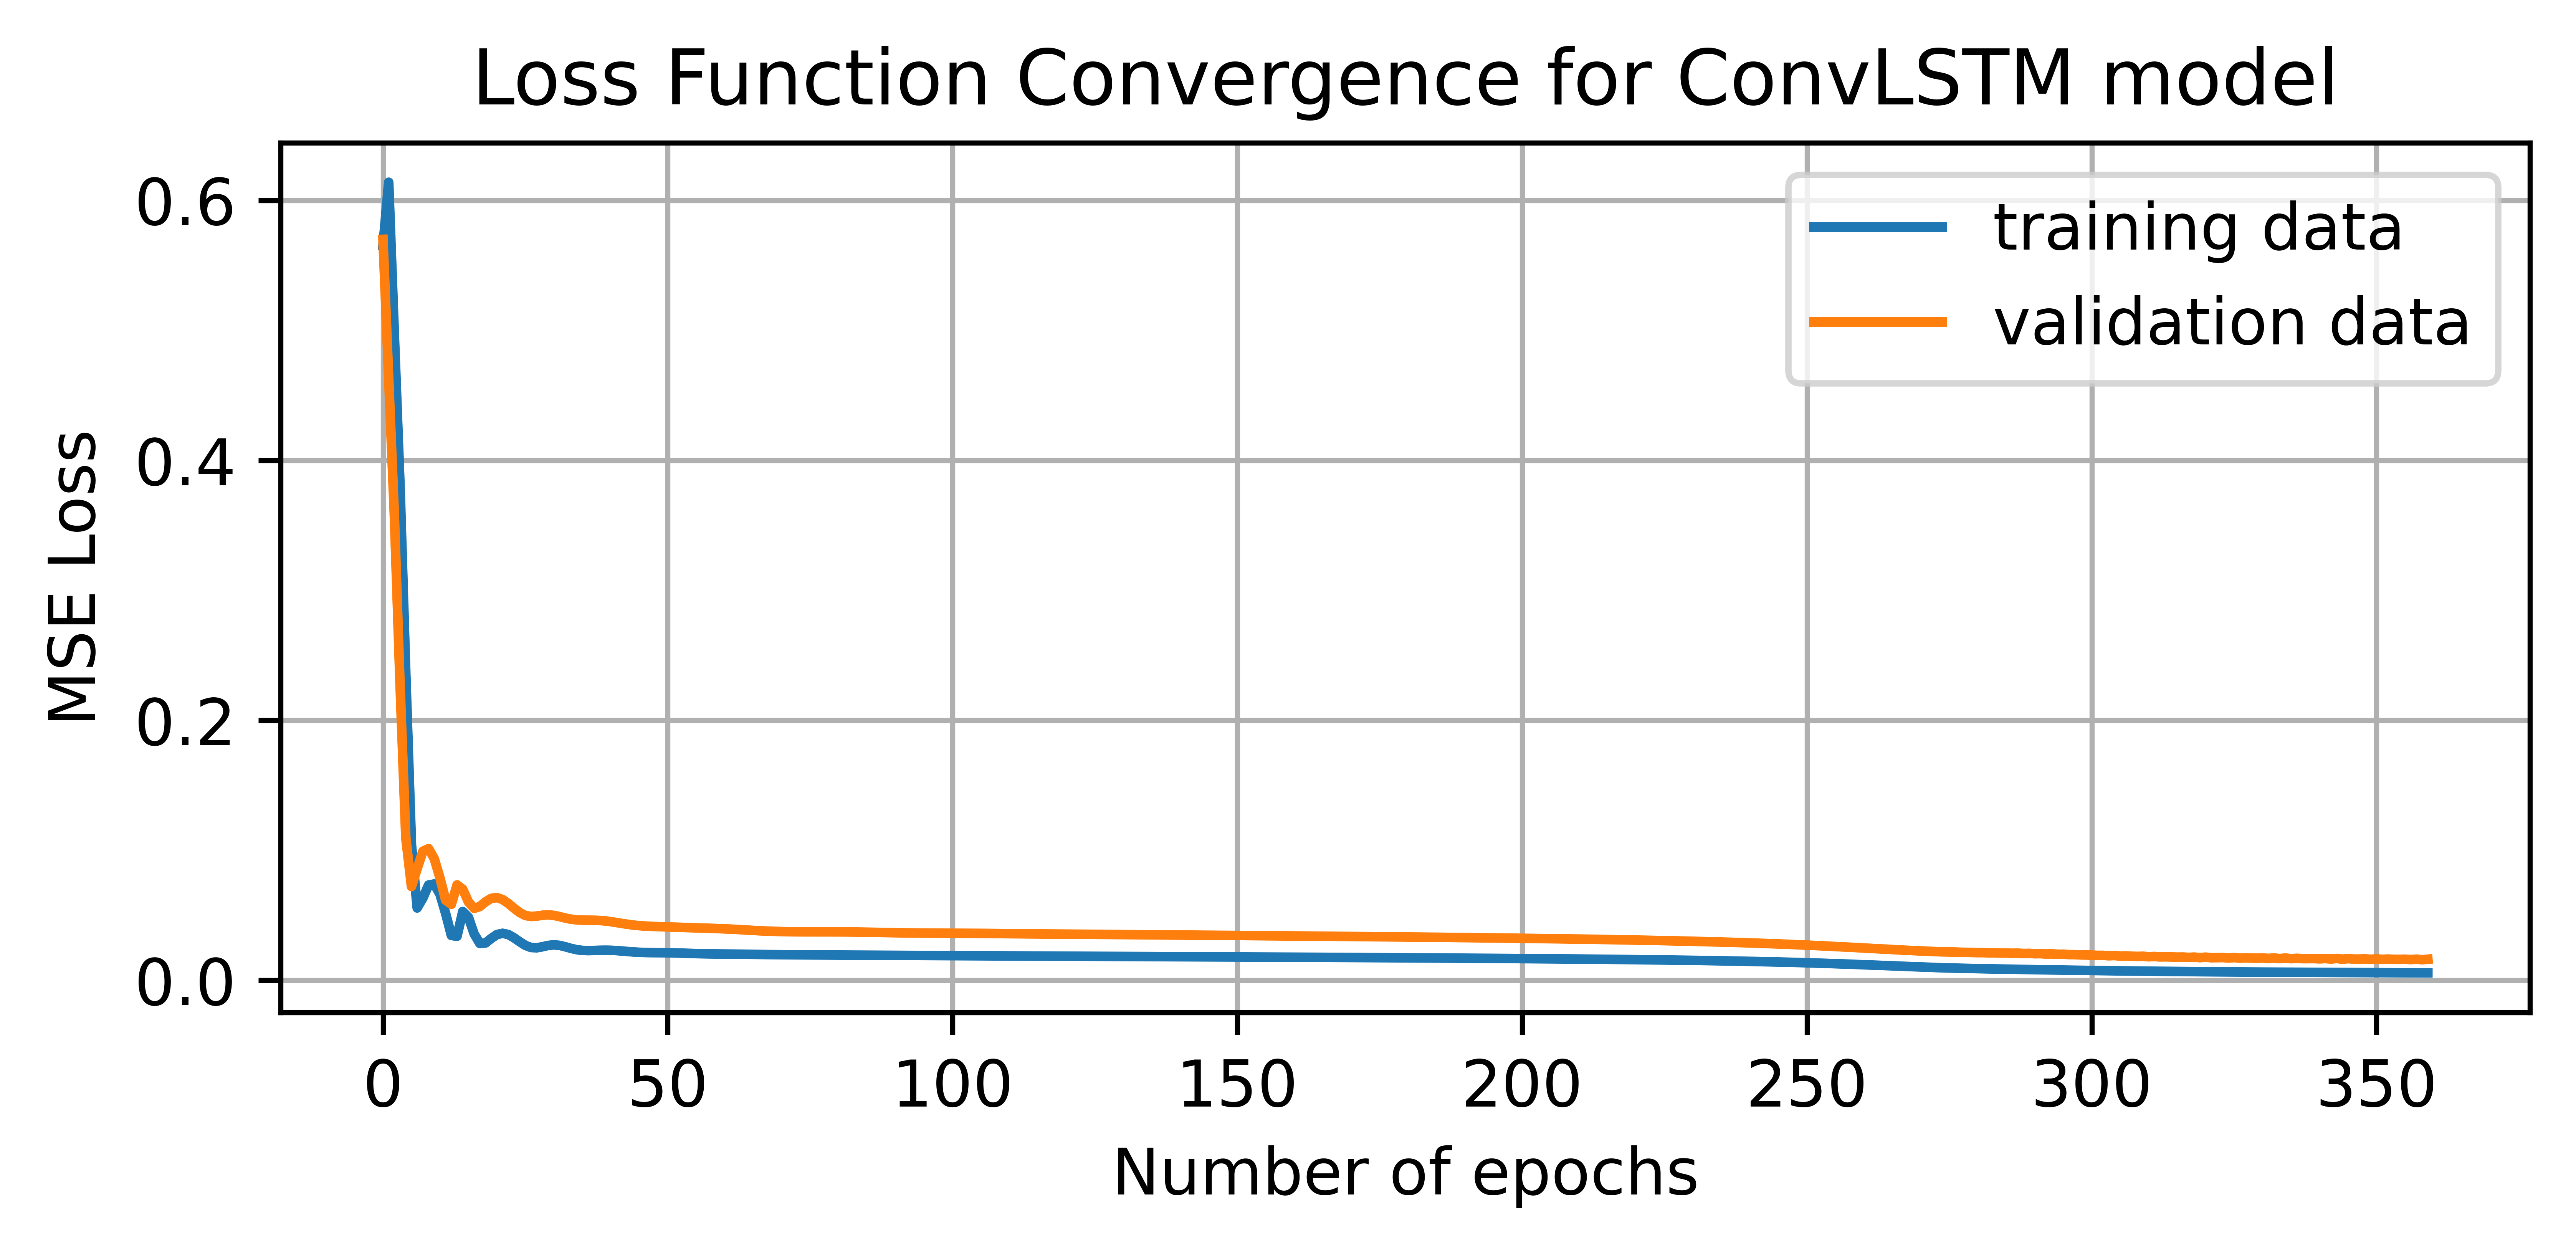

In [ ]:
plt.figure(figsize=(6.3, 2.5), dpi = 1200)
plt.plot(history3.history['loss'], label='training data')
plt.plot(history3.history['val_loss'], label='validation data')
plt.title('Loss Function Convergence for ConvLSTM model')
plt.ylabel('MSE Loss')
plt.xlabel('Number of epochs')
plt.grid()
plt.legend(loc="upper right")
#plt.savefig('/content/gdrive/My Drive/Colab Notebooks/Results/Loss_Function_Convergence.pdf', format='pdf')
plt.show()

In [ ]:
model3.save('/content/gdrive/My Drive/Colab Notebooks/ConvLSTM_model.h5')

## Plotting Figures

(13, 10800)


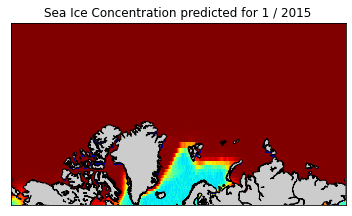

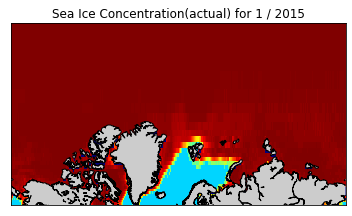

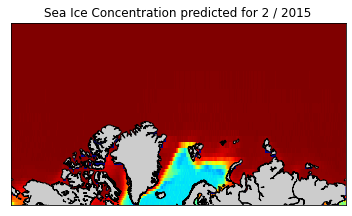

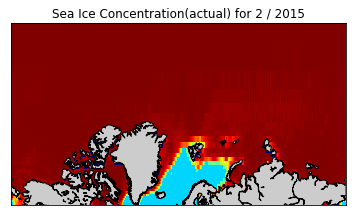

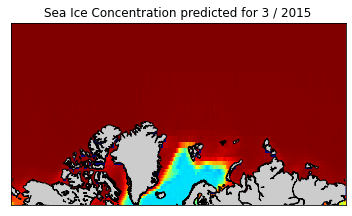

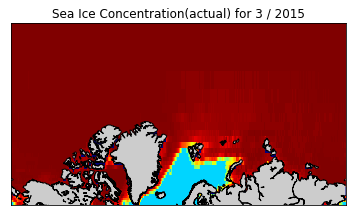

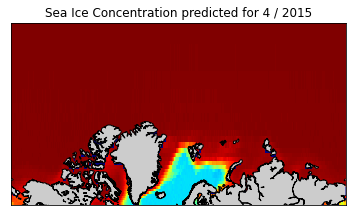

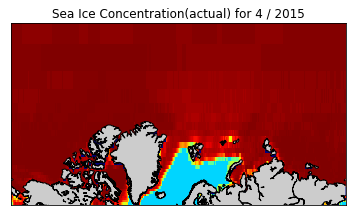

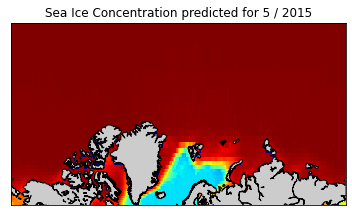

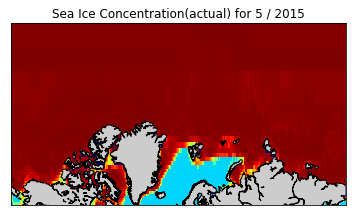

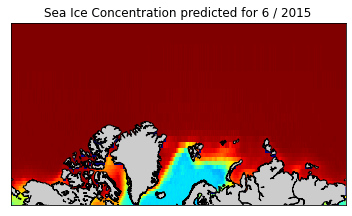

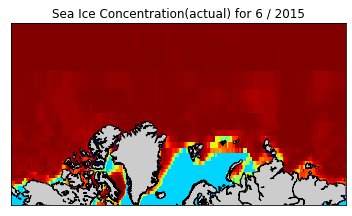

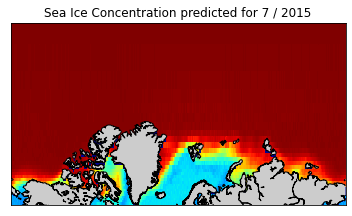

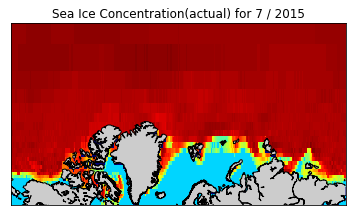

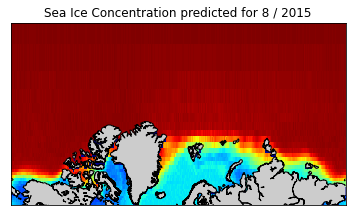

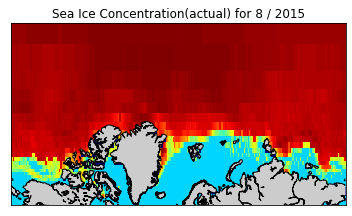

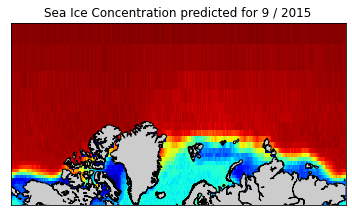

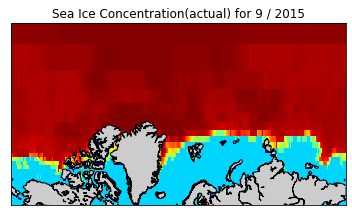

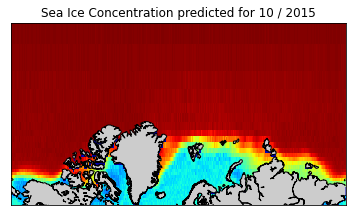

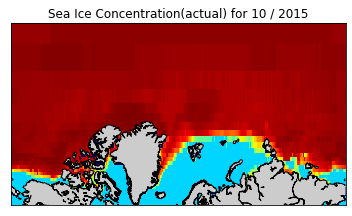

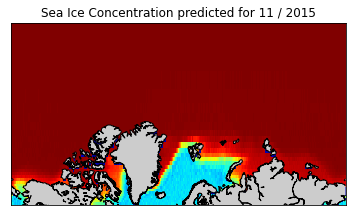

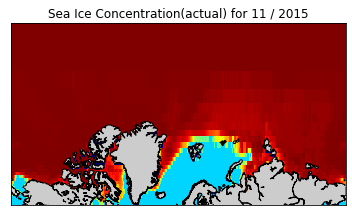

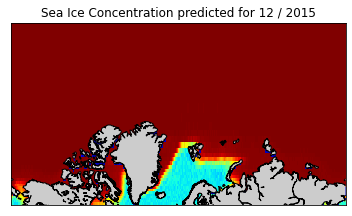

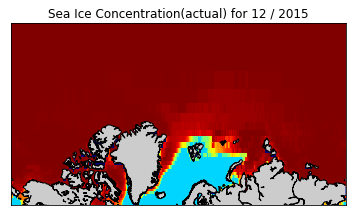

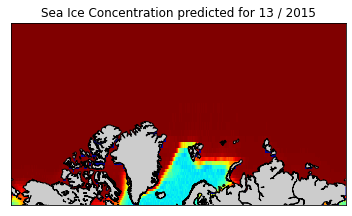

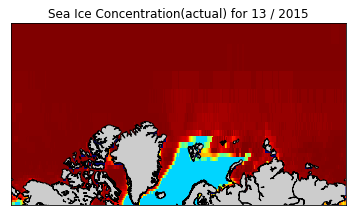

In [ ]:
X_check = X_test[137:150].reshape(13, N_stack, numlat, numlong,  1)
Y_check = Y_test[137:150]
Y_pred = model3.predict(X_check)
print(Y_pred.shape)
Y_pred = Y_pred.reshape(13, 30, 360)
Y_check = Y_check.reshape(13, 30, 360)
for i in range(len(Y_pred)):
  mp = Basemap(projection='merc',llcrnrlon=-180.,llcrnrlat=60.,urcrnrlon=180.,urcrnrlat=89.,resolution='l')
  longs , lats = np.meshgrid(longi,lati)
  x ,y = mp(longs, lats)
  c_scheme = mp.pcolor(x,y,np.squeeze(Y_pred[i]), cmap = 'jet')
  mp.drawcoastlines()
  mp.fillcontinents()
  plt.title('Sea Ice Concentration predicted for ' + str(i+1) + ' / 2015')
  plt.show()
  mp = Basemap(projection='merc',llcrnrlon=-180.,llcrnrlat=60.,urcrnrlon=180.,urcrnrlat=89.,resolution='l')
  longs , lats = np.meshgrid(longi,lati)
  x ,y = mp(longs, lats)
  c_scheme = mp.pcolor(x,y,np.squeeze(Y_check[i]), cmap = 'jet')
  mp.drawcoastlines()
  mp.fillcontinents()
  plt.title('Sea Ice Concentration(actual) for ' + str(i+1) + ' / 2015')
  plt.show()

In [ ]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]

# Years 2012-2019. 8 years, 96 months. 101-196
currYear = 2012
X_check = X_test[101:197].reshape(12*8, N_stack, numlat, numlong,  1)
Y_check = Y_test[101:197]
Y_pred = model3.predict(X_check)
Y_pred = Y_pred.reshape(12*8, 30, 360)
Y_check = Y_check.reshape(12*8, 30, 360)
diff_Y = Y_pred-Y_check
for i in range(len(diff_Y)):
  if(i%12 == 0 and i>0):
    currYear += 1
  mp = Basemap(projection='merc',llcrnrlon=-180.,llcrnrlat=60.,urcrnrlon=180.,urcrnrlat=89.,resolution='l')
  longs , latis = np.meshgrid(longi,lati)
  x ,y = mp(longs, latis)
  c_scheme = mp.pcolor(x,y,np.squeeze(diff_Y[i]), cmap = 'seismic')
  mp.drawcoastlines()
  mp.fillcontinents()
  plt.title('(Y_pred-Y_actual) for ' + months[i%12]  + ' ' + str(currYear))
  plt.show()


## Saving the output

In [ ]:
import datetime
import netCDF4 as nc

In [ ]:
fn = '/content/ConvLSTM_output.nc'
#date_data = [datetime.datetime(2003+(i+8)//12, (i+7)%11 + 1, 1) for i in range(205)]
ds = nc.Dataset(fn, 'w', format='NETCDF4')
time = ds.createDimension('time', None)
lat = ds.createDimension('lat', 30)
lon = ds.createDimension('lon', 360)
times = ds.createVariable('time', 'f4', ('time',))
lats = ds.createVariable('lat', 'f4', ('lat',))
lons = ds.createVariable('lon', 'f4', ('lon',))
sics = ds.createVariable('sic', 'f4', ('time', 'lat', 'lon',))
sics.units = 'Unknown'
lats[:] = np.arange(60.0, 90.0, 1.0)
lons[:] = np.arange(-180.0, 180.0, 1.0)
#times.units = 'Months since 2003-08-01'
#times[:] = nc.date2num(date_data,'Days since 2003-08-01')

In [ ]:
Y1 = model3.predict(X_test.reshape(len(X_test), N_stack, numlat, numlong,  1))
Y1 = Y1.reshape(205,30,360)
#sics[:] = Y1
ds.variables['sic'][:] = Y1
Y_test1 = Y_test.reshape(205,30,360)
print(sics.shape)
print(Y_test1.shape)

(205, 30, 360)
(205, 30, 360)


In [ ]:
ds.close()

In [ ]:
fn = '/content/ConvLSTM_output.nc'
#date_data = [datetime.datetime(2003+(i+8)//12, (i+7)%11 + 1, 1) for i in range(205)]
ds = nc.Dataset(fn, 'r')
ds.variables

{'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
 unlimited dimensions: 
 current shape = (30,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float32 lon(lon)
 unlimited dimensions: 
 current shape = (360,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'sic': <class 'netCDF4._netCDF4.Variable'>
 float32 sic(time, lat, lon)
     units: Unknown
 unlimited dimensions: time
 current shape = (205, 30, 360)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 float32 time(time)
 unlimited dimensions: time
 current shape = (205,)
 filling on, default _FillValue of 9.969209968386869e+36 used}

In [ ]:
sic_out = ds.variables['sic'][:]
long_out = ds.variables['lon'][:]
lat_out = ds.variables['lat'][:]

In [ ]:
X_check = X_test.reshape(len(X_test), N_stack, numlat, numlong,  1)
Y_check = Y_test
Y_pred = model3.predict(X_check)
Y_pred = Y_pred.reshape(len(X_check), 30, 360)
Y_check = Y_check.reshape(len(X_check), 30, 360)

print("ACC value in (%): ", acc(Y_check, Y_pred))
print("MAE value: ", mae(Y_test, Y_pred))
print("RMSE value: ", rmse(Y_test, Y_pred))
print("NSE value: ", nse(Y_test, Y_pred))

ACC value in (%):  98.28857166381269
MAE value:  0.05026271016805804
RMSE value:  0.12345642447939985
NSE value:  0.9656112475438494
